In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# pip install pandas_profiling

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# scaler = StandardScaler()

In [ ]:
# deneme1 = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [ ]:
# pp.ProfileReport(deneme1)  # Bir önceki ile karşılaştır

In [ ]:
# scaler = MinMaxScaler()

In [ ]:
# deneme2 = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [ ]:
# pp.ProfileReport(deneme2)  # Bir önceki ile karşılaştır

In [ ]:
# Not: Decision Tree, Random Forest gibi ensemble algoritmalar için features'ların scale işlemine gerek yoktur.
# Çünkü bunlar non-parametric algoritmalardır.

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [14]:
df.duplicated().any()

True

In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().any()

False

In [18]:
X = df.drop("target", axis=1)

In [19]:
y = df.target

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)

### K Neighbour

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_pred = knn.predict(X_test_scaled)

In [31]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.82      0.76      0.79        49

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



<AxesSubplot:>

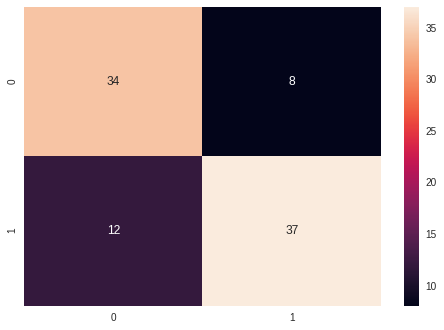

In [32]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [ ]:
error_rate = []# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

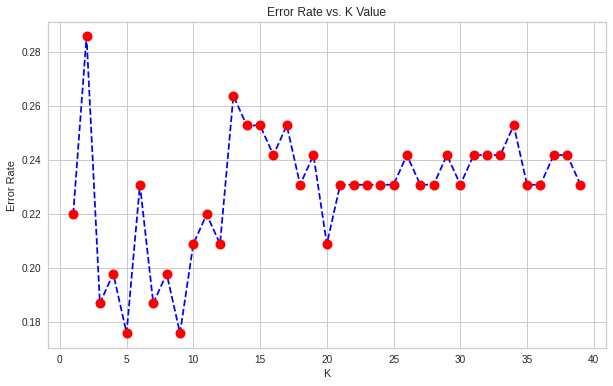

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [37]:
knn_pred = knn.predict(X_test_scaled)

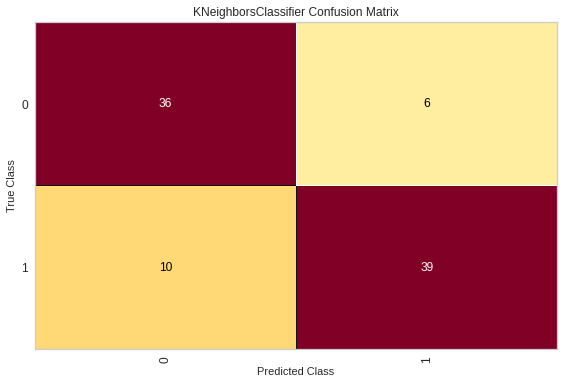

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [ ]:
print(classification_report(y_test, knn_pred))

In [39]:
grid_params = {'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1, 2], 'leaf_size': [20, 25, 30, 35, 40, 45]}

In [40]:
cv = GridSearchCV(KNeighborsClassifier(n_neighbors=5, n_jobs=-1), param_grid=grid_params, n_jobs=-1, verbose=3, scoring='recall')

In [41]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40, 45], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=3)

In [42]:
cv.best_score_

0.8521739130434781

In [43]:
cv.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'p': 1, 'weights': 'uniform'}

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=20, p=1, weights='distance', n_jobs=-1)

In [45]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_jobs=-1, p=1, weights='distance')

In [46]:
knn_pred = knn.predict(X_test_scaled)

In [47]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.82      0.84        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



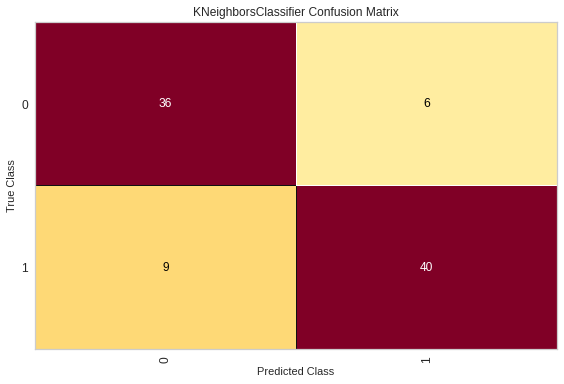

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

### Logistic Regression

In [49]:
log_model = LogisticRegression(random_state=42, n_jobs=-1)

In [50]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [51]:
log_pred = log_model.predict(X_test_scaled)

In [52]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



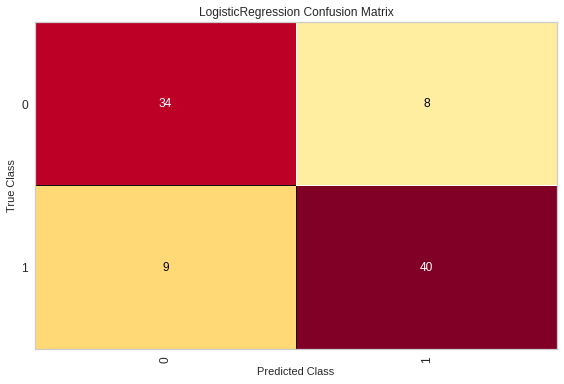

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

### SVC Classifier

In [ ]:
sv_model = SVC(random_state=42)

In [ ]:
sv_model.fit(X_train_scaled, y_train)

In [ ]:
sv_pred = sv_model.predict(X_test_scaled)

In [ ]:
cm = ConfusionMatrix(sv_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [ ]:
grid_param = {'C':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [1, 2, 3, 4],
             'gamma':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 'scale', 'auto'],
             'random_state':[42]}

In [ ]:
cv = GridSearchCV(SVC(), param_grid=grid_param, n_jobs=-1, scoring='recall')

In [ ]:
cv.fit(X_train_scaled, y_train)

In [ ]:
cv.best_score_

In [ ]:
cv.best_params_

In [ ]:
sv_pred = cv.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, sv_pred))

### Decision Tree

In [55]:
tree_model = DecisionTreeClassifier(random_state=42)

In [56]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
tree_pred = tree_model.predict(X_test)

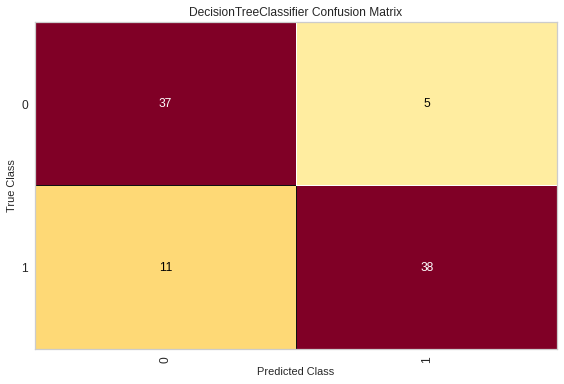

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [58]:
cm = ConfusionMatrix(tree_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
print(classification_report(y_test, tree_pred))

In [59]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(2, 20)
}

In [60]:
cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_dict,
                 cv=10, verbose=3, n_jobs=-1, scoring='recall')

In [61]:
cv.fit(X_train, y_train)

Fitting 10 folds for each of 11664 candidates, totalling 116640 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(2, 20)},
             scoring='recall', verbose=3)

In [63]:
cv.best_score_

0.8787878787878787

In [ ]:
tree_pred = cv.predict(X_test)

In [ ]:
cm = ConfusionMatrix(cv)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
print(classification_report(y_test, tree_pred))

### Random Forest

In [66]:
rf_model = RandomForestClassifier(random_state=42)

In [68]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
rf_pred = rf_model.predict(X_test)

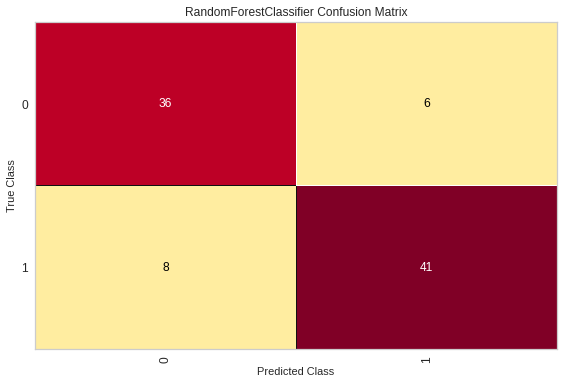

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [73]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [74]:
param_dict = {'n_estimators':[50, 100, 300, 500],
             'max_features':[2, 4, 6, 8],
             'max_depth':[3, 5, 8],
             'min_samples_split':[2, 5, 8]}

In [75]:
cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_dict,
                 cv=10, verbose=3, n_jobs=-1, scoring='recall')

In [76]:
cv.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='recall', verbose=3)

In [77]:
cv.best_score_

0.8962121212121211

In [78]:
rf_pred = cv.predict(X_test)

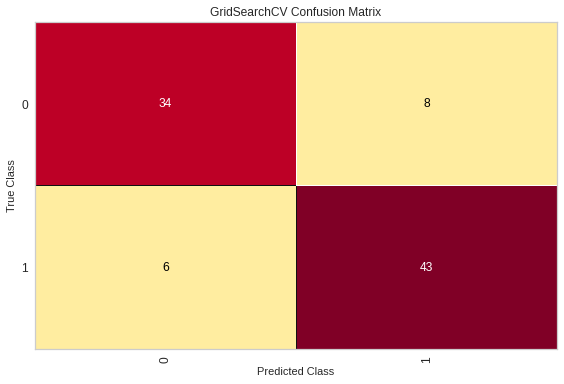

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
cm = ConfusionMatrix(cv)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [80]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.84      0.88      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

